In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats import shapiro
import copy
import statsmodels.stats.api as sms
from scipy.stats import wilcoxon
from matplotlib.pyplot import figure

## Importing data

In [9]:
# Importing data

diagnosis = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\interim\diagnosis.csv")
late_morbidity = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\interim\late morbidity.csv")
external_radiotherapy = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\interim\external beam radiotherapy.csv")
brachytherapy = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\interim\brachytherapy.csv")
response_status = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\interim\response status.csv")

# Merging datasets
pre_df = diagnosis.merge(late_morbidity,on='id').merge(external_radiotherapy, on='id').merge(brachytherapy, on='id').merge(response_status, on='id')


In [10]:
df = pre_df[['id','icru_bladder','icru_rectum','eqd2_bladder','eqd2_rectum','hrctv_volume','eqd2_total_dose', 'late_response_status', 'total_days','late_response_status_binary','T']].copy()
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 3 to 83
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           44 non-null     int64  
 1   icru_bladder                 44 non-null     float64
 2   icru_rectum                  44 non-null     float64
 3   eqd2_bladder                 44 non-null     float64
 4   eqd2_rectum                  44 non-null     float64
 5   hrctv_volume                 44 non-null     float64
 6   eqd2_total_dose              44 non-null     float64
 7   late_response_status         44 non-null     object 
 8   total_days                   44 non-null     float64
 9   late_response_status_binary  44 non-null     int64  
 10  T                            44 non-null     object 
dtypes: float64(7), int64(2), object(2)
memory usage: 4.1+ KB


## Descriptive statistics

In [11]:
df.describe()

,id,icru_bladder,icru_rectum,eqd2_bladder,eqd2_rectum,hrctv_volume,eqd2_total_dose,total_days,late_response_status_binary
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,147.045455,64.695455,66.175000,75.429545,61.172727,28.765909,85.613636,62.045455,0.840909
std,21.743702,8.928005,7.288542,8.509791,6.125902,9.447848,2.034424,15.104219,0.369989
min,104.000000,51.500000,54.000000,54.200000,48.900000,10.500000,80.700000,44.000000,0.000000
25%,131.750000,57.975000,61.575000,71.575000,56.975000,23.725000,84.450000,52.000000,1.000000
50%,147.500000,63.200000,64.800000,77.500000,60.500000,27.100000,85.800000,57.000000,1.000000
75%,164.500000,67.950000,72.450000,81.000000,65.475000,33.925000,86.400000,65.000000,1.000000
max,184.000000,90.400000,84.100000,89.100000,75.100000,65.900000,89.900000,103.000000,1.000000


In [12]:
#create 95% confidence interval for population mean weight
data = df['eqd2_bladder']
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data)) 



(72.84233242156101, 78.01675848752988)

<AxesSubplot:xlabel='icru_bladder', ylabel='Count'>

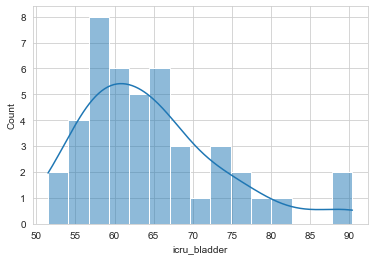

In [13]:
sns.histplot(df['icru_bladder'],kde=True,bins=15)

In [14]:
#Testing for normality
alpha = 0.05
icru_bladder=df['icru_bladder']
icru_bladder.dropna(inplace=True)
statistic,p_value = shapiro(icru_bladder)
print ("Testing values of icru_bladder for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of icru_bladder for normality using the Shapiro-Wilk test.
The test statistic is: 0.9120767116546631. The p_value is: 0.002614009426906705.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


<AxesSubplot:xlabel='eqd2_bladder', ylabel='Count'>

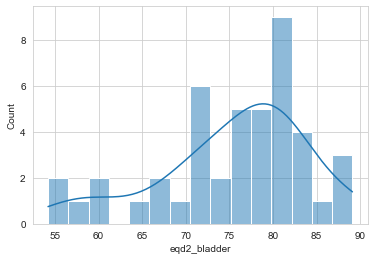

In [15]:
sns.histplot(df['eqd2_bladder'],kde=True,bins=15)

In [16]:
#Testing for normality
alpha = 0.05
eqd2_bladder=df['eqd2_bladder']
eqd2_bladder.dropna(inplace=True)
statistic,p_value = shapiro(eqd2_bladder)
print ("Testing values of eqd2_bladder for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of eqd2_bladder for normality using the Shapiro-Wilk test.
The test statistic is: 0.9331147074699402. The p_value is: 0.013421189971268177.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


<AxesSubplot:xlabel='icru_rectum', ylabel='Count'>

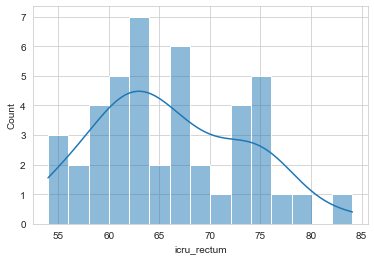

In [17]:
sns.histplot(df['icru_rectum'],kde=True,bins=15)

In [18]:
#Testing for normality
alpha = 0.05
icru_rectum=df['icru_rectum']
icru_rectum.dropna(inplace=True)
statistic,p_value = shapiro(icru_rectum)
print ("Testing values of icru_bladder for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of icru_bladder for normality using the Shapiro-Wilk test.
The test statistic is: 0.9667508602142334. The p_value is: 0.23133273422718048.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


<AxesSubplot:xlabel='eqd2_rectum', ylabel='Count'>

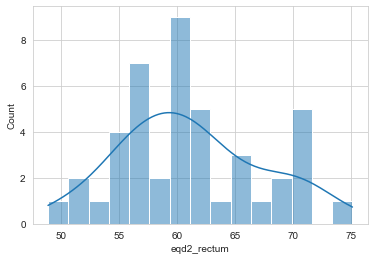

In [19]:
sns.histplot(df['eqd2_rectum'],kde=True,bins=15)

In [20]:
#Testing for normality
alpha = 0.05
eqd2_rectum=df['eqd2_rectum']
eqd2_rectum.dropna(inplace=True)
statistic,p_value = shapiro(eqd2_rectum)
print ("Testing values of icru_bladder for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of icru_bladder for normality using the Shapiro-Wilk test.
The test statistic is: 0.9741008281707764. The p_value is: 0.41850417852401733.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


### Paired T-test between icru_rectum and eqd2_rectum

<Figure size 1600x800 with 0 Axes>

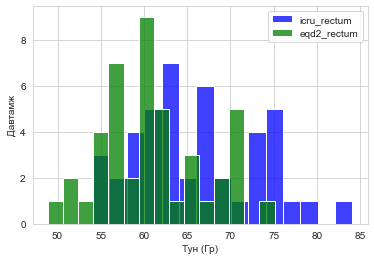

<Figure size 1600x800 with 0 Axes>

In [21]:
sns.histplot(df['icru_rectum'],bins=15,color='blue',label='icru_rectum')
sns.histplot(df['eqd2_rectum'],bins=15,color='green',label='eqd2_rectum')
plt.xlabel("Тун (Гр)")
plt.ylabel("Давтамж")
plt.legend(loc="upper right")
figure(figsize=(20, 10),dpi=80)

C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='icru_rectum'>

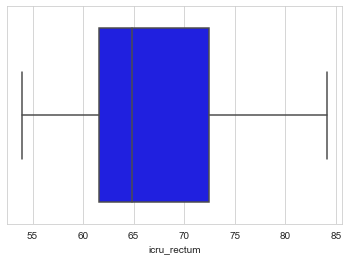

In [22]:
sns.boxplot(df['icru_rectum'],color='blue')

C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='eqd2_rectum'>

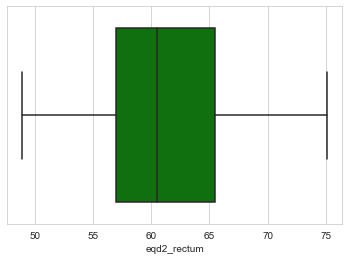

In [23]:
sns.boxplot(df['eqd2_rectum'],color='green')


Assumption 1. Independence

The assumption is met because in our case, a patient belongs to only one sample.

Assumption 2. Normality

The assumption is met and sufficiently checked previously.

Assumption 3. Homogeneity of variances

We can use the following rule of thumb to determine if the variances between the two samples are equal: If the ratio of the larger variance to the smaller variance is less than 4, then we can assume the variances are approximately equal and use the two sample t-test.

In [24]:
#Checking for homogeneity of variances
ratio = eqd2_rectum.var() / icru_rectum.var()
print("The ratio between two variances of sample groups are: {}".format(ratio))

The ratio between two variances of sample groups are: 0.7064131834513783


The ratio between two variances is 0.87 < 4. Therefore, the assumption is met.

Assumption 4

A two sample t-test makes the assumption that both samples were obtained using a random sampling method. It is automatically assumed.

Now, let's perform the test  since all assumptions are met.

In [25]:
rectum = df[['icru_rectum', 'eqd2_rectum']]
rectum.dropna(axis=0,inplace=True)

C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [26]:
alpha = 0.05
statistic,p_value = stats.ttest_rel(rectum['icru_rectum'], rectum['eqd2_rectum'] )
print ("Testing values of icru_rectum and eqd2_rectum if the two population means are equal."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The two population means are not equal."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of icru_rectum and eqd2_rectum if the two population means are equal.
The test statistic is: 4.7634073286770535. The p_value is: 2.1882923027524152e-05.
H0 = The two population means are equal.
HA = The two population means are not equal.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


The results of the paired t-test show that we have sufficient evidence to say that the mean values of icru_rectum and eqd2_rectum are different. '

Now, we perform one-tailed version of the paired t-test to test whether values of eqd2_rectum are less than the values of icru_rectum.

In [27]:
alpha = 0.05
statistic,p_value = stats.ttest_rel(rectum['icru_rectum'], rectum['eqd2_rectum'], alternative='greater' )
print ("Testing values of icru_rectum and eqd2_rectum if the two population means are equal."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The population mean of icru_rectum is greater than eqd2_rectum."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of icru_rectum and eqd2_rectum if the two population means are equal.
The test statistic is: 4.7634073286770535. The p_value is: 1.0941461513762076e-05.
H0 = The two population means are equal.
HA = The population mean of icru_rectum is greater than eqd2_rectum.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


Finding 95 percent confidence interval for the difference of means of icru_rectum and eqd2_rectum

In [28]:
cm = sms.CompareMeans(sms.DescrStatsW(rectum['icru_rectum']), sms.DescrStatsW(rectum['eqd2_rectum']))
print (cm.tconfint_diff(usevar='pooled'))

(2.148900395170435, 7.85564505937503)


In [29]:
mean_diff = rectum['icru_rectum'].mean() - rectum['eqd2_rectum'].mean()
print(mean_diff)

5.002272727272732


In [30]:
cm.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,5.0023,1.435,3.485,0.001,2.149,7.856


In [31]:
rectum_diff = rectum['icru_rectum'] - rectum['eqd2_rectum']

In [32]:
rectum_diff.describe()

count    44.000000
mean      5.002273
std       6.965880
min      -7.900000
25%       1.200000
50%       4.050000
75%       8.825000
max      26.700000
dtype: float64

<AxesSubplot:ylabel='Count'>

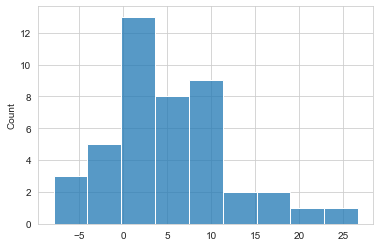

In [33]:
sns.histplot(rectum_diff)

### Paired T-test between icru_bladder and eqd2_bladder

<Figure size 1600x800 with 0 Axes>

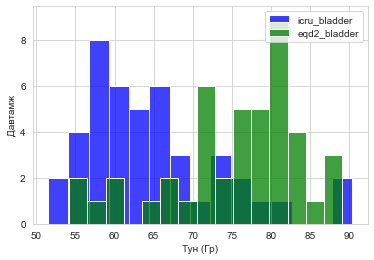

<Figure size 1600x800 with 0 Axes>

In [34]:
sns.histplot(df['icru_bladder'],bins=15,color='blue',label='icru_bladder')
sns.histplot(df['eqd2_bladder'],bins=15,color='green',label='eqd2_bladder')
plt.xlabel("Тун (Гр)")
plt.ylabel("Давтамж")
plt.legend(loc="upper right")
figure(figsize=(20, 10),dpi=80)

C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='icru_bladder'>

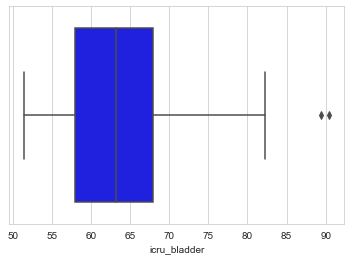

In [35]:
sns.boxplot(df['icru_bladder'],color='blue')

C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='eqd2_bladder'>

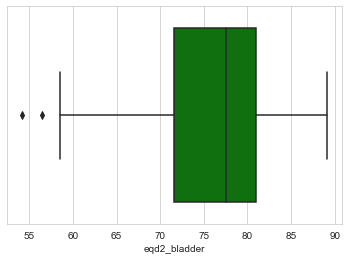

In [36]:
sns.boxplot(df['eqd2_bladder'],color='green')


Assumption 1. Independence

The assumption is met because in our case, a patient belongs to only one sample.

Assumption 2. Normality

The assumption is met and sufficiently checked previously.

Assumption 3. Homogeneity of variances

We can use the following rule of thumb to determine if the variances between the two samples are equal: If the ratio of the larger variance to the smaller variance is less than 4, then we can assume the variances are approximately equal and use the two sample t-test.

In [37]:
#Checking for homogeneity of variances
ratio = eqd2_bladder.var() / icru_bladder.var()
print("The ratio between two variances of sample groups are: {}".format(ratio))

The ratio between two variances of sample groups are: 0.908508363771199


The ratio between two variances is 0.998 < 4. Therefore, the assumption is met.

Assumption 4

A two sample t-test makes the assumption that both samples were obtained using a random sampling method. It is automatically assumed.

Now, let's perform the test  since all assumptions are met.

In [38]:
bladder = df[['icru_bladder', 'eqd2_bladder']]
bladder.dropna(axis=0,inplace=True)

C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [39]:
alpha = 0.05
statistic,p_value = stats.ttest_rel(bladder['icru_bladder'], bladder['eqd2_bladder'] )
print ("Testing values of icru_bladder and eqd2_bladder if the two population means are equal."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The two population means are not equal."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of icru_bladder and eqd2_bladder if the two population means are equal.
The test statistic is: -5.96827388980907. The p_value is: 4.0662162912431585e-07.
H0 = The two population means are equal.
HA = The two population means are not equal.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


The results of the paired t-test show that we have sufficient evidence to say that the mean values of icru_bladder and eqd2_bladder are different. '

Now, we perform one-tailed version of the paired t-test to test whether values of eqd2_bladder are less than the values of icru_bladder.

In [40]:
alpha = 0.05
statistic,p_value = stats.ttest_rel(bladder['icru_bladder'], bladder['eqd2_bladder'], alternative='less' )
print ("Testing values of icru_bladder and eqd2_bladder if the two population means are equal."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The population mean of icru_bladder is less than eqd2_bladder."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of icru_bladder and eqd2_bladder if the two population means are equal.
The test statistic is: -5.96827388980907. The p_value is: 2.0331081456215793e-07.
H0 = The two population means are equal.
HA = The population mean of icru_bladder is less than eqd2_bladder.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


Finding 95 percent confidence interval for the difference of means of icru_bladder and eqd2_bladder

In [41]:
cm = sms.CompareMeans(sms.DescrStatsW(bladder['icru_bladder']), sms.DescrStatsW(bladder['eqd2_bladder']))
print (cm.tconfint_diff(usevar='pooled'))

(-14.430475477408006, -7.03770634077387)


In [42]:
mean_diff = bladder['icru_bladder'].mean() - bladder['eqd2_bladder'].mean()
print(mean_diff)

-10.73409090909091


In [43]:
cm.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-10.7341,1.859,-5.773,0.000,-14.430,-7.038


In [44]:
alpha = 0.05
statistic,p_value = wilcoxon(bladder['icru_bladder'], bladder['eqd2_bladder'], alternative='less')
print ("Testing values of icru_bladder and eqd2_bladder if the two population means are equal using Wilcoxon Signed-Rank Test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The population mean of icru_bladder is less than eqd2_bladder."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of icru_bladder and eqd2_bladder if the two population means are equal using Wilcoxon Signed-Rank Test.
The test statistic is: 110.0. The p_value is: 5.846152761331987e-06.
H0 = The two population means are equal.
HA = The population mean of icru_bladder is less than eqd2_bladder.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.
